In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df = pd.read_csv('datasets/dfIT-update.csv')

In [4]:
df.head(3)

,Unnamed: 0,user,date,likeCount,tweetText,hashtags,lang,replies,retweetCount,replyCount
0,0,40annibuttati,2023-02-05 23:17:31+00:00,0,Interessante riflessione: \ni contribuenti ita...,"['Alitalia', 'Microsoft', 'ChatGPT']",it,0.0,0.0,NaN
1,1,PakiAsWell,2023-02-05 23:15:41+00:00,0,Quando ti spari le pose con l'AI ... senza dir...,"['ChatGPT', 'AppleDeveloperAcademy', 'swiftUI'...",it,0.0,0.0,NaN
2,2,GbshiatsuM,2023-02-05 23:12:22+00:00,0,@yarotrof Chat gpt non ragiona bensì riprende ...,NaN,it,0.0,0.0,NaN


In [5]:
df.tail(3)

,Unnamed: 0,user,date,likeCount,tweetText,hashtags,lang,replies,retweetCount,replyCount
21047,21047,AndyVic14,2022-12-19 22:10:31+00:00,0,@la_bongia Questo ChatGPT sta sfuggendo di mano 😂,NaN,it,0.0,0.0,NaN
21048,21048,rsalanitri,2022-12-19 20:32:18+00:00,0,L'intelligenza artificiale ha i suoi momenti d...,"['burnout', 'intelligenzaartificiale', 'chatgpt']",it,0.0,0.0,NaN
21049,21049,viaggrego,2022-12-19 20:19:11+00:00,0,Trascrizione Automatiche di #Video #YouTube gr...,"['Video', 'YouTube', 'ChatGPT']",it,0.0,1.0,NaN


In [6]:
df.shape

(21050, 10)

In [7]:
df.columns

Index(['Unnamed: 0', 'user', 'date', 'likeCount', 'tweetText', 'hashtags',
       'lang', 'replies', 'retweetCount', 'replyCount'],
      dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Unnamed: 0           0
user              6708
date                 0
likeCount            0
tweetText            0
hashtags        109440
lang                 0
replies           5596
retweetCount       107
replyCount      281713
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21050 entries, 0 to 21049
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    21050 non-null  int64  
 1   user          4018 non-null   object 
 2   date          21050 non-null  object 
 3   likeCount     21050 non-null  int64  
 4   tweetText     21050 non-null  object 
 5   hashtags      10894 non-null  object 
 6   lang          21050 non-null  object 
 7   replies       20933 non-null  float64
 8   retweetCount  20915 non-null  float64
 9   replyCount    117 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 1.6+ MB


In [10]:
df.drop(['Unnamed: 0'], axis=1, inplace= True)
df.head(3)

,user,date,likeCount,tweetText,hashtags,lang,replies,retweetCount,replyCount
0,40annibuttati,2023-02-05 23:17:31+00:00,0,Interessante riflessione: \ni contribuenti ita...,"['Alitalia', 'Microsoft', 'ChatGPT']",it,0.0,0.0,NaN
1,PakiAsWell,2023-02-05 23:15:41+00:00,0,Quando ti spari le pose con l'AI ... senza dir...,"['ChatGPT', 'AppleDeveloperAcademy', 'swiftUI'...",it,0.0,0.0,NaN
2,GbshiatsuM,2023-02-05 23:12:22+00:00,0,@yarotrof Chat gpt non ragiona bensì riprende ...,NaN,it,0.0,0.0,NaN


In [11]:
df.describe() # controllo i valori relativi al numero di Like --> andamento esponenziale e Replies

,likeCount,replies,retweetCount,replyCount
count,21050.00000,20933.000000,20915.000000,117.000000
mean,3.38361,0.523336,0.594167,0.598291
std,26.29775,3.460734,2.900384,3.342670
min,0.00000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000
75%,2.00000,0.000000,0.000000,0.000000
max,1544.00000,205.000000,104.000000,35.000000


In [12]:
df.nunique()

user             1484
date             2294
likeCount         149
tweetText       17047
hashtags         4178
lang                1
replies            50
retweetCount       52
replyCount          7
dtype: int64

In [13]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        try:
            itm = data[col].value_counts().index[0]
            val = data[col].value_counts().values[0]
            items.append(itm)
            vals.append(val)
        except Exception as ex:
            print(ex)
            items.append(0)
            vals.append(0)
            continue
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [14]:
most_frequent_values(df) #cerco numero di like e replies più frequente

,user,date,likeCount,tweetText,hashtags,lang,replies,retweetCount,replyCount
Total,4018,21050,21050,21050,10894,21050,20933,20915,117
Most frequent item,alepom,2023-03-30 00:00:00,0,ChatGPT e la rivoluzione dell'AI nelle aziende...,['ChatGPT'],it,0.0,0.0,0.0
Frequence,72,499,11401,28,2485,21050,15914,16859,95
Percent from total,1.792,2.371,54.162,0.133,22.811,100.0,76.024,80.607,81.197


# Faccio studi su andamento dei valori --> tutti andamento esponenziale

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df['user'].unique()

array(['40annibuttati', 'PakiAsWell', 'GbshiatsuM', ..., 'CatySegatori',
       'AndyVic14', 'rsalanitri'], dtype=object)

In [17]:
# Calcolo il numero di post per username
df['user'].value_counts()

alepom            72
andrea_boscaro    34
StartMagNews      30
ChatGptItalia     30
CIaudiaGiulia     30
                  ..
CheClimaFa         1
alexruggieri_      1
Andre4Ferrante     1
GiulioDaprela      1
rsalanitri         1
Name: user, Length: 1484, dtype: int64

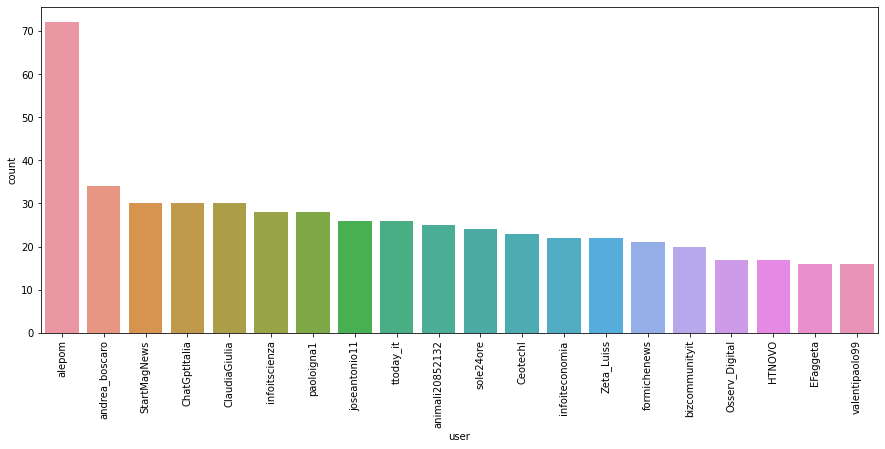

In [18]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='user', order=df["user"].value_counts().index[:20])
plt.xticks(rotation=90)
plt.show()

In [19]:
df.head(3)

,user,date,likeCount,tweetText,hashtags,lang,replies,retweetCount,replyCount
0,40annibuttati,2023-02-05 23:17:31+00:00,0,Interessante riflessione: \ni contribuenti ita...,"['Alitalia', 'Microsoft', 'ChatGPT']",it,0.0,0.0,NaN
1,PakiAsWell,2023-02-05 23:15:41+00:00,0,Quando ti spari le pose con l'AI ... senza dir...,"['ChatGPT', 'AppleDeveloperAcademy', 'swiftUI'...",it,0.0,0.0,NaN
2,GbshiatsuM,2023-02-05 23:12:22+00:00,0,@yarotrof Chat gpt non ragiona bensì riprende ...,NaN,it,0.0,0.0,NaN


In [20]:
df['replies'].unique()

array([  0.,   3.,   1.,   2.,   4.,   5.,  10.,  18.,   6.,   9.,   7.,
        11.,  13.,  14.,  25.,  16.,  48.,   8.,  20.,  nan,  33.,  12.,
        26.,  50.,  21.,  15., 144.,  17.,  28.,  53.,  39.,  32.,  19.,
        22.,  35.,  37., 133.,  45.,  27.,  65.,  24.,  99., 205.,  40.,
        30.,  34., 121., 161., 148., 153.,  71.])

In [21]:
len(df['replies'].unique()) #numero di valori per il conteggio dei Reply

51

In [22]:
df['replies'].value_counts()

0.0      15914
1.0       3637
2.0        700
3.0        225
4.0        142
5.0         62
6.0         54
7.0         32
8.0         25
10.0        16
11.0        16
9.0         13
12.0        12
13.0         8
20.0         7
14.0         7
19.0         6
16.0         6
25.0         5
15.0         5
48.0         3
17.0         3
18.0         3
22.0         2
34.0         2
28.0         2
33.0         2
26.0         2
148.0        1
161.0        1
121.0        1
153.0        1
65.0         1
30.0         1
40.0         1
205.0        1
99.0         1
24.0         1
144.0        1
27.0         1
45.0         1
133.0        1
37.0         1
35.0         1
32.0         1
39.0         1
53.0         1
21.0         1
50.0         1
71.0         1
Name: replies, dtype: int64

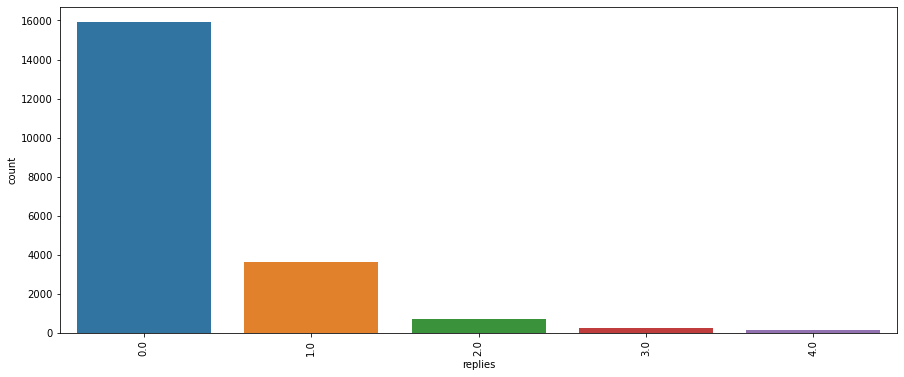

In [23]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='replies', order=df["replies"].value_counts().index[:5])
plt.xticks(rotation=90)
plt.show()

In [24]:
df['likeCount'].unique()

array([   0,    1,    2,    3,    4,    6,   10,   12,   13,   24,    9,
         45,    5,   19,    8,   11,   14,    7,   16,   29,   46,  531,
         48,   15,   58,   34,   17,   97,   28,   47,   30,  161,   18,
         32,   62,   36,   20,   59,  214,   40,   54,  171,   27,   25,
        255, 1192,   22,   61,   21,  144,   70,   66,   98,   23,   85,
         78,   41,   82,   37,   38,   26,  135,   89,  926,   69,   56,
         83,   65,  726,  182,   60,  122,   74,   72,   68,   53,   31,
         52,  153,   42,  205,   35,   81,  238,   44,  211,   86,  110,
        284,  143,  126,  366,  152,   43,   51,  111,   79,  142,  837,
        150,   63,   73,   50,  403,  244,  100,  241,   94,  177,  326,
        741,   80,   88,  304,  242,  180,  155,  461,   75,   55,   39,
         71,  106,  112,  129,  400,  277,  200, 1544,  121,  533,  107,
        232,  210,   67,   57,  148, 1195,  125,   99,  137,  281,  321,
         49,   77,  675,  274,  202,  246])

In [25]:
df['likeCount'].value_counts()

0      11401
1       4046
2       1684
3        937
4        606
       ...  
135        1
82         1
242        1
211        1
246        1
Name: likeCount, Length: 149, dtype: int64

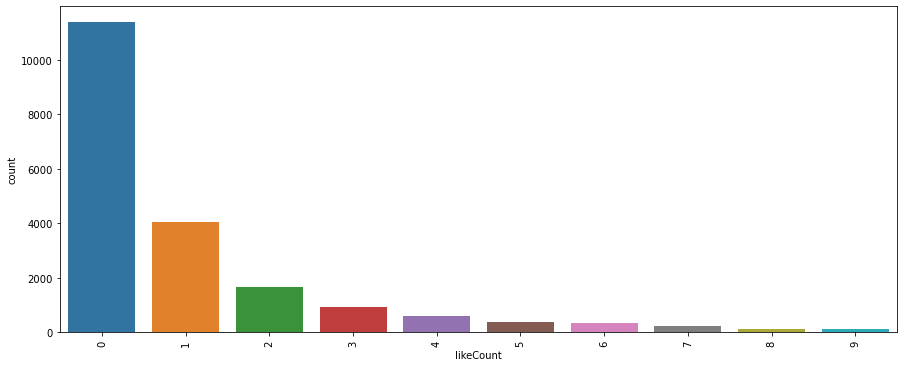

In [26]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='likeCount', order=df["likeCount"].value_counts().index[:10])
plt.xticks(rotation=90)
plt.show()

# Faccio esplorazione sui contenuti realtivi al numero maggiore e minore di Likes, Mentions, Replies --> dataset italiano

In [27]:
#CERCO I TWEET CON IL MAGGIOR NUMERO DI LIKE

pd.set_option('display.max_colwidth', None)
# Ordinare il DataFrame in base al numero di likes in ordine decrescente
df_sorted = df.sort_values('likeCount', ascending=False)

# Selezionare i primi 5 tweet con il numero di likes più alto
top_5_tweets = df_sorted.head(5)

# Selezionare solo le colonne desiderate (tweetText e Nr. Likes)
top_5_tweets = top_5_tweets[['tweetText', 'likeCount']]

# Stampa del DataFrame con i primi 5 tweet e i relativi contenuti
top_5_tweets


,tweetText,likeCount
14535,"Dotazione standard di uno studente moderno: Iphone 13pro, iper iPad 60”, super calcolatrice scientifica a 70 cifre, smartwatch, sistema gps con auricolari satellitari invisibili, Pc 12core, google, chatGPT e forum specializzati. Dotazione standard mia da studente: https://t.co/tLFD3tcOES",1544
16697,A quanto pare non ho passato il test di Turing #ChatGPT https://t.co/GHUsGXvuSv,1195
3170,A quanto pare non ho passato il test di Turing #ChatGPT https://t.co/GHUsGXvuSv,1192
1334,A quanto pare non ho passato il test di Turing #ChatGPT https://t.co/GHUsGXvuSv,1192
4075,Il mio #ChatGPT ha qualcosa di strano https://t.co/uZnEth48CA,926


In [28]:
#CERCO I TWEET CON IL MINOR NUMERO DI LIKE

pd.set_option('display.max_colwidth', None)
# Ordinare il DataFrame in base al numero di likes in ordine decrescente
df_sorted = df.sort_values('likeCount')

# Selezionare i primi 10 tweet con il numero di likes più alto
top_10_tweets = df_sorted.head(10)

# Selezionare solo le colonne desiderate (tweetText e Nr. Likes)
top_10_tweets = top_10_tweets[['tweetText', 'likeCount']]

# Stampa del DataFrame con i primi 10 tweet e i relativi contenuti
top_10_tweets


,tweetText,likeCount
0,Interessante riflessione: \ni contribuenti italiani hanno buttato 10 miliardi in #Alitalia per non avere nulla; \n#Microsoft ha investito 10 miliardi in OpenAi per ottenere uno strumento rivoluzionario come #ChatGPT\n\nhttps://t.co/i3ojxATifv,0
12286,"@CardRavasi Temo poi che la massa di stoltezze sia destinata ad aumentare , anche grazie a questi programmi di scrittura tipo #ChatGPT",0
12290,"🎙️ RadioFTT, per la fionda 📘, canale Telegram;\n\nAbbiamo chiesto a #ChatGPT di provare a scrivere il #discorso di #Zelensky a #Sanremo2023. E niente, ci arriva l'intelligenza artificiale e non Giorgia Meloni e il PD\n\nBasta armi all'Ucraina, entra in la fionda📘 https://t.co/8kLf8Tpoyz",0
12292,"😱ChatGpt predice il futuro in Borsa? L’allerta sul crollo dei mercati il 15 febbraio.\nChe faccio, vendo???? 🤣🤣🤣\nBorsa Italiana #azioni #chatgpt Corriere della Sera https://t.co/sPZOp6ubM0",0
12293,"CHATGPT, IN RETE C’È UN MODELLO DI INTELLIGENZA ARTIFICIALE CHE SCRIVE I TEMI AL POSTO DEGLI STUDENTI\nhttps://t.co/AKQcgNjShe",0
12295,"RT://Intervista a Gianni Agnelli, attraverso ChatGPT - https://t.co/jvrPHEciIz",0
12303,"@FedericoRampini #ChatGPT non scrive articoli o saggi, fa un collage di quello che è già stato scritto e ha a disposizione. Si spera che un giornalista/saggista/scrittore faccia qualcosa di più mettendoci del suo (es. informazioni di prima mano esclusive, capacità di analisi ecc.). Ma ormai… https://t.co/JZ1wjVRcUR",0
12304,@FedericoRampini ma per favore non sia ridicolo. Ah no forse ha ragione io faccio domande a ChatGPT e forse scrive meglio di lei ma per ora ripeterebbe le elementari piu volte. Chissà un domani come prevedeva Asimov,0
12305,"Per te, invece,sarebbe di grande aiuto chatGpt\nMagari se la interpellasi ti eviterebbe di dire tutto e il contrario di tutto.\nPerò, dubito che la stessa AI ti possa rispondere. \nSarebbe come rispondere al nulla.\nhttps://t.co/3K2aF4yMDl",0
12309,Federico Rampini: «Così ho perso la gara di scrittura con ChatGPT» https://t.co/ccDbpAOXrl,0


# Retweet Count 


In [29]:
df.head(3)

,user,date,likeCount,tweetText,hashtags,lang,replies,retweetCount,replyCount
0,40annibuttati,2023-02-05 23:17:31+00:00,0,Interessante riflessione: \ni contribuenti italiani hanno buttato 10 miliardi in #Alitalia per non avere nulla; \n#Microsoft ha investito 10 miliardi in OpenAi per ottenere uno strumento rivoluzionario come #ChatGPT\n\nhttps://t.co/i3ojxATifv,"['Alitalia', 'Microsoft', 'ChatGPT']",it,0.0,0.0,NaN
1,PakiAsWell,2023-02-05 23:15:41+00:00,0,Quando ti spari le pose con l'AI ... senza dirgli che il resto dell'app l'hai fatta con i tutorial su YouTube. #ChatGPT #AppleDeveloperAcademy #swiftUI #ai https://t.co/6sz5wdLOoC,"['ChatGPT', 'AppleDeveloperAcademy', 'swiftUI', 'ai']",it,0.0,0.0,NaN
2,GbshiatsuM,2023-02-05 23:12:22+00:00,0,@yarotrof Chat gpt non ragiona bensì riprende informazioni online quali che siano.,NaN,it,0.0,0.0,NaN


In [30]:
#CERCO I TWEET CON IL MAGGIOR NUMERO DI Retweet count 

pd.set_option('display.max_colwidth', None)
# Ordinare il DataFrame in base al numero di likes in ordine decrescente
df_sorted = df.sort_values('retweetCount', ascending=False)

# Selezionare i primi 5 tweet con il numero di likes più alto
top_5_tweets = df_sorted.head(5)

# Selezionare solo le colonne desiderate (tweetText e Nr. Likes)
top_5_tweets = top_5_tweets[['tweetText', 'retweetCount']]

# Stampa del DataFrame con i primi 5 tweet e i relativi contenuti
top_5_tweets


,tweetText,retweetCount
14535,"Dotazione standard di uno studente moderno: Iphone 13pro, iper iPad 60”, super calcolatrice scientifica a 70 cifre, smartwatch, sistema gps con auricolari satellitari invisibili, Pc 12core, google, chatGPT e forum specializzati. Dotazione standard mia da studente: https://t.co/tLFD3tcOES",104.0
16697,A quanto pare non ho passato il test di Turing #ChatGPT https://t.co/GHUsGXvuSv,96.0
1334,A quanto pare non ho passato il test di Turing #ChatGPT https://t.co/GHUsGXvuSv,96.0
3170,A quanto pare non ho passato il test di Turing #ChatGPT https://t.co/GHUsGXvuSv,96.0
4075,Il mio #ChatGPT ha qualcosa di strano https://t.co/uZnEth48CA,78.0


In [31]:
#CERCO I TWEET CON IL MINOR NUMERO DI Retweetcount 

pd.set_option('display.max_colwidth', None)
# Ordinare il DataFrame in base al numero di likes in ordine decrescente
df_sorted = df.sort_values('retweetCount')

# Selezionare i primi 5 tweet con il numero di likes più alto
top_5_tweets = df_sorted.head(5)

# Selezionare solo le colonne desiderate (tweetText e Nr. Likes)
top_5_tweets = top_5_tweets[['tweetText', 'retweetCount']]

# Stampa del DataFrame con i primi 5 tweet e i relativi contenuti
top_5_tweets

,tweetText,retweetCount
0,Interessante riflessione: \ni contribuenti italiani hanno buttato 10 miliardi in #Alitalia per non avere nulla; \n#Microsoft ha investito 10 miliardi in OpenAi per ottenere uno strumento rivoluzionario come #ChatGPT\n\nhttps://t.co/i3ojxATifv,0.0
11517,Anche la spiegazione di #ChatGPT https://t.co/8DM4li4RUg,0.0
11518,"@lauracesaretti1 La Schlein (come prima Soumahoro) è una chat gpt applicata alla politica, non idee, no proposte di soluzioni, ripetizione a ruota degli slogan della sx. Il Pd si deve spostare a sx (RdC? patrimoniale?) via i dirigenti (Franceschini/Orlando/Boccia o quelli che non la sostengono?)",0.0
18510,"Buongiorno a tutti, web-amici! Quali prospettive vi sono per i #SEO copywriter con la diffusione di IA che scrivono contenuti? Analisi di pro e contro di ChatGPT https://t.co/4ttSeS5TSR",0.0
18507,"🤔 Non credo che il primo che passa per strada che chiede a #ChatGPT di una mail di phishing potrebbe fare grandi cose. \n🤬 Con un paio di ricerche sui motori, otteniamo info. \n☝️ Non è lo strumento il problema. \n🔗 Il post: https://t.co/Lq5vNEdF8W \n\n#AI https://t.co/1Gwov1AcmG",0.0


In [32]:
#CERCO I TWEET CON IL MAGGIOR NUMERO DI REPLIES 

pd.set_option('display.max_colwidth', None)
# Ordinare il DataFrame in base al numero di likes in ordine decrescente
df_sorted = df.sort_values('replies', ascending=False)

# Selezionare i primi 5 tweet con il numero di likes più alto
top_5_tweets = df_sorted.head(5)

# Selezionare solo le colonne desiderate (tweetText e Nr. Likes)
top_5_tweets = top_5_tweets[['tweetText', 'replies']]

# Stampa del DataFrame con i primi 5 tweet e i relativi contenuti
top_5_tweets

,tweetText,replies
14535,"Dotazione standard di uno studente moderno: Iphone 13pro, iper iPad 60”, super calcolatrice scientifica a 70 cifre, smartwatch, sistema gps con auricolari satellitari invisibili, Pc 12core, google, chatGPT e forum specializzati. Dotazione standard mia da studente: https://t.co/tLFD3tcOES",205.0
18086,"ChatGPT e intelligenza artificiale, interviene il Ministero: “Opportuna una regolamentazione come accade con gli smartphone o le calcolatrici” https://t.co/2D1AcrKTVG",161.0
18286,"Raffaele Zenti: “Critiche inconsistenti a ChatGpt. Inutile vietare questa tecnologia straordinaria: gestiamola"" (di S. Renda) https://t.co/CEVRjUI1th",153.0
18107,"Il collettivo Roy Ming ha pubblicato una storia per bambini realizzata con Midjourney e ChatGpt, rinfocolando il dibattito sull'evoluzione dei sistemi di Ai e il futuro degli artisti https://t.co/fANA6Csskn",148.0
5019,"Tutti a parlare di #ChatGPT come del fenomeno del secolo, l’intelligenza artificiale che sostituirà il lavoro umano, ecc ecc. \nHo provato a interrogarlo sulla mia biografia. Il risultato è impressionante. Per precisione? No, per quantità di castronerie. Manco la data di nascita… https://t.co/0p7UHh77l2",144.0


In [33]:
#CERCO I TWEET CON IL MINOR NUMERO DI REPLIES 

pd.set_option('display.max_colwidth', None)
# Ordinare il DataFrame in base al numero di likes in ordine decrescente
df_sorted = df.sort_values('replies')

# Selezionare i primi 5 tweet con il numero di likes più alto
top_5_tweets = df_sorted.head(5)

# Selezionare solo le colonne desiderate (tweetText e Nr. Likes)
top_5_tweets = top_5_tweets[['tweetText', 'replies']]

# Stampa del DataFrame con i primi 5 tweet e i relativi contenuti
top_5_tweets

,tweetText,replies
0,Interessante riflessione: \ni contribuenti italiani hanno buttato 10 miliardi in #Alitalia per non avere nulla; \n#Microsoft ha investito 10 miliardi in OpenAi per ottenere uno strumento rivoluzionario come #ChatGPT\n\nhttps://t.co/i3ojxATifv,0.0
13135,"Mercoledì = #Ventagli!\n\nAbbiamo fatto 4 chiacchiere sul ciclismo con #ChatGPT, il chatbot di @OpenAI che tanto sta facendo parlare di sé in queste ultime settimane 💻\n\n✍️ @TeoMatt89 \nhttps://t.co/FQlr5XXihH",0.0
13136,I nuovi motori di ricerca basati sull'intelligenza artificiale di Microsoft e Google (in primis) daranno risposte univoche. Faranno sintesi di tutto quel che c'è in rete dando una risposta ad una domanda dell'utente\nProporranno una verità.\nPerché ce n'è solo una?\n#ChatGPT\n#bard,0.0
13138,"📌 #Bard, la risposta di #Google a #ChatGPT\nLa nuova creatura di #Alphabet ""mira a combinare l'ampiezza della conoscenza mondiale con la potenza, l'intelligenza e la creatività dei nostri grandi modelli linguistici"", ha spiegato #SundarPichai. https://t.co/qkj03hWQxt",0.0
13139,#SportelloItalia ore 12.30 #mutui #tassi variabili e fissi Simone Capecchi #Crif #IA #chatGPT @MaxCerof Marco Trombetti @translation #focus #Libero #virgilio @BPuschiasis1 @ConsumatoriA #OnAir 📞335.8097742 📩economico@rai.it https://t.co/c0u2zC36Vd https://t.co/hYkY0oKvSy,0.0


In [34]:
from wordcloud import WordCloud, STOPWORDS

In [35]:

from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer


In [36]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show() 

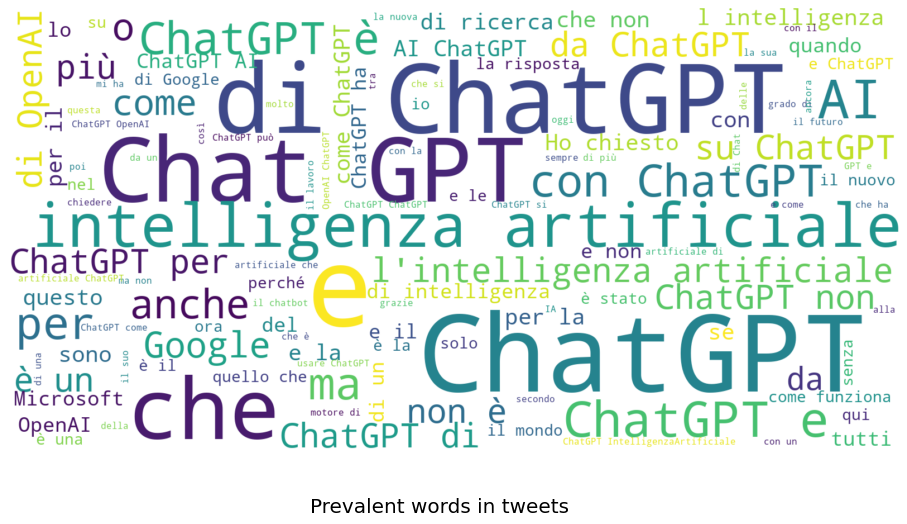

In [37]:
show_wordcloud(df['tweetText'], title = 'Prevalent words in tweets')

# Faccio sentiment analysis per sicurezza con il codice di Claudio

In [38]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [39]:
df['Sentiment'] = ''
for index, row in df.iterrows():
    comment = row['tweetText']
    
    # Applica VADER all'attuale commento
    scores = sia.polarity_scores(comment)
    compound_score = scores['compound']
    
    # Assegna un'etichetta di sentiment in base al punteggio compound
    if compound_score > 0:
        sentiment = 'pos'
    elif compound_score < 0:
        sentiment = 'neg'
    else:
        sentiment = 'neu'
    
    # Assegna l'etichetta di sentiment al DataFrame
    df.at[index, 'Sentiment'] = sentiment

# Stampa il DataFrame con le nuove etichette di sentiment
df['Sentiment'].value_counts()

neu    16899
pos     2991
neg     1160
Name: Sentiment, dtype: int64

In [40]:
sizes = df["Sentiment"].value_counts()
labels = df["Sentiment"].unique()

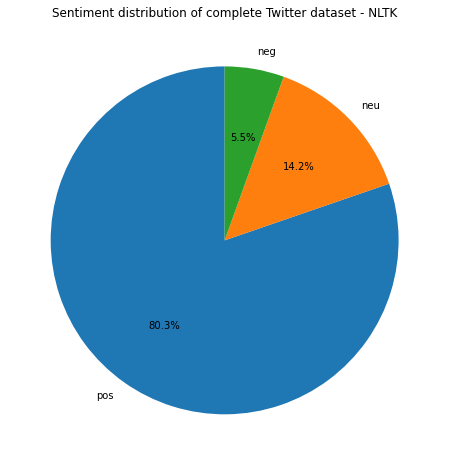

In [41]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12, 8]

plt.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = False, startangle = 90)
plt.title("Sentiment distribution of complete Twitter dataset - NLTK")
#plt.savefig("pie_nltksentiment-complete.png")
plt.show()

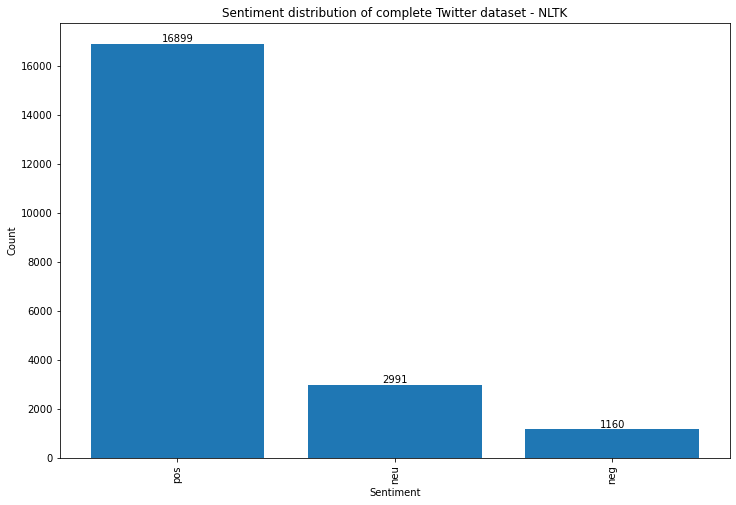

In [42]:
#faccio istogramma some sotto per controllare i valori
plt.rcParams["figure.figsize"] = [12, 8]

plt.bar(labels, sizes)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment distribution of complete Twitter dataset - NLTK")

# Aggiungi i valori sopra ogni barra
for i, v in enumerate(sizes):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.xticks(rotation=90)
plt.show()


# Sembra che i valori tornino perché il sentiment analyzer usato è lo stesso

# Eseguo la sentiment anlaysis come funzione per fare altre ricerche 

In [43]:
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    try:
        if sia.polarity_scores(post)["compound"] > 0:
            return "Positive"
        elif sia.polarity_scores(post)["compound"] < 0:
            return "Negative"
        else:
            return "Neutral"  
    except:
        return "Neutral"

In [44]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    
    colors = ["green", "red", "blue"]
    counts.plot(kind='bar', ax=ax1, color=colors)
    percent.plot(kind='bar', ax=ax2, color=colors)
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()



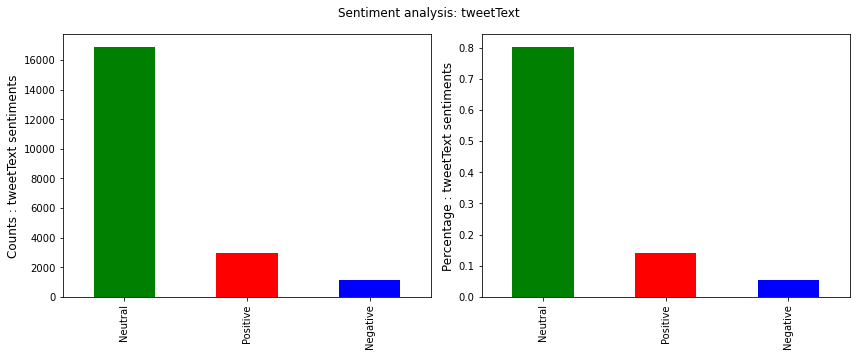

In [45]:
df['text_sentiment'] = df['tweetText'].apply(lambda x: find_sentiment(x))
plot_sentiment(df, 'text_sentiment', 'tweetText')

In [46]:
df['text_sentiment'].value_counts() #controllo che la funzione restituisca gli stessi valori di Claudio

Neutral     16899
Positive     2991
Negative     1160
Name: text_sentiment, dtype: int64

In [47]:
df.shape

(21050, 11)

# Devo inserire anche il contenuto per verificare che non ci siano errori perché non mi torna una cosa nel grafico in fondo

In [48]:
tweets_agg_df = df.groupby(["likeCount", "text_sentiment"]).first().reset_index()
tweets_agg_df = tweets_agg_df[['likeCount', 'text_sentiment', 'tweetText']]
tweets_agg_df.head(10)


,likeCount,text_sentiment,tweetText
0,0,Negative,"#chatGPT c'è arrivata.\nIl mondo della politica, no\n#Russia #Ucraina https://t.co/AeOlVm7ShV"
1,0,Neutral,Quando ti spari le pose con l'AI ... senza dirgli che il resto dell'app l'hai fatta con i tutorial su YouTube. #ChatGPT #AppleDeveloperAcademy #swiftUI #ai https://t.co/6sz5wdLOoC
2,0,Positive,Interessante riflessione: \ni contribuenti italiani hanno buttato 10 miliardi in #Alitalia per non avere nulla; \n#Microsoft ha investito 10 miliardi in OpenAi per ottenere uno strumento rivoluzionario come #ChatGPT\n\nhttps://t.co/i3ojxATifv
3,1,Negative,@AnticoBollitore Molto pericolose. E questo è niente...\nMi viene l'orticaria ogni volta che vedo qualche imbecille dire che ha provato chat gpt. Non si rendono conto del danno anche per gli autori e i creativi.\nPerderanno il lavoro e saranno stati loro stessi a darsi la zappa sui piedi.
4,1,Neutral,Azioni intelligenza artificiale: 15 titoli da tenere d'occhio Le migliori 15 azioni Intelligenza Artificiale (AI) da tenere d'occhio https://t.co/iEWJX1ntVz #ai #ia #intelligenzaartificiale #artificialintelligence #openai #chatgpt
5,1,Positive,Dopo Amazon Alexa (https://t.co/xZbynHwI5I) riproviamo con la combo #Metaverse e #ChatGPT ? https://t.co/qKYYrqc0gc
6,2,Negative,"Dai, non sapeva cosa dire e aveva chiesto aiuto a #ChatGPT. \n\nGli aveva detto: guarda gli spazi intorno alla Russia dal lato europeo e per favore scrivimi una frase che Putin invaderà questi spazi. \nE ChatGPT ha trovato #Kaliningrad, #Transnistria, #Moldavia.🤣🤣🤣"
7,2,Neutral,"#ChatGPTPlus cos’è, costi, i rumors sulla possibile integrazione in Bing e l’attesa reazione di #Google #Sparrow. \nTutto quello che serve sapere sulla nuova versione a pagamento della piattaforma del momento\nhttps://t.co/7xBXGWNdGf\n#ai #chat #chatgpt @MilenaLazzaroni @franzrusso"
8,2,Positive,"🙄LA FINE DEL CAPITALISMO\n\nSe speravate di assistere al tramonto dell'impero dei big tech deficienti stile Zuckerberg, aspettate a festeggiare.\n\nIl tizio nella foto è il nuovo idolo digitale: si chiama Samuel Altman ed è il CEO di Open AI, ovvero Chat GPT e tutte le altre... https://t.co/ngXnWilYU1"
9,3,Negative,ChatGPT &amp; le generative AI\nInteressante e semplice podcast di Etabeta di @RaiRadio2 sul nuovo hype\n\nhttps://t.co/hkv9hTwApv\n\nFoto generata con DALL E 2 con prompt:\nAI killed (or tookover) the radio &amp; podcast stars in Keith Haring style\n\n#ChatGPT #dalle2 https://t.co/iiOSCKicCi


# Osservo i contenuti per verificare l'accuratezza della classificazione...

# Raggruppo i tweet in base al numero di like

In [49]:
tweets_agg_df = df.groupby(["likeCount", "text_sentiment"])["tweetText"].count().reset_index()
tweets_agg_df.columns = ["likeCount", "text_sentiment", "count"]
tweets_agg_df.head(5)

,likeCount,text_sentiment,count
0,0,Negative,522
1,0,Neutral,9403
2,0,Positive,1476
3,1,Negative,274
4,1,Neutral,3173


#questo codice non ha senso perché sono troppi dati

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=tweets_agg_df, x="likeCount", y="count", hue="text_sentiment")
plt.xlabel("Nr. Likes")
plt.ylabel("Count")
plt.title("Number of Tweets by Likes and Sentiment")
plt.show()

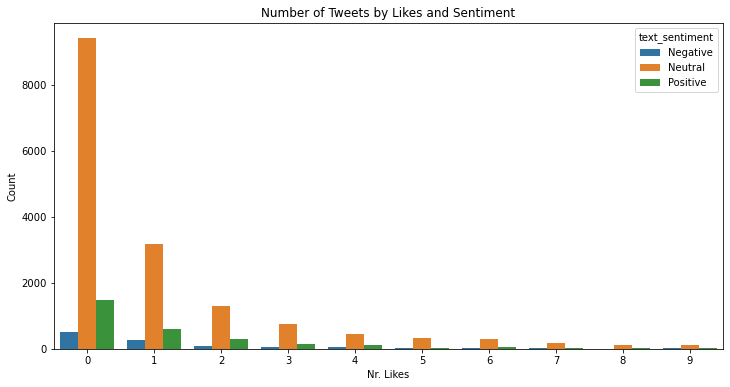

In [50]:
plt.figure(figsize=(12, 6))
sns.barplot(data=tweets_agg_df, x="likeCount",order=df["likeCount"].value_counts().index[:10], y="count", hue="text_sentiment")
plt.xlabel("Nr. Likes")
plt.ylabel("Count")
plt.title("Number of Tweets by Likes and Sentiment")
plt.show()


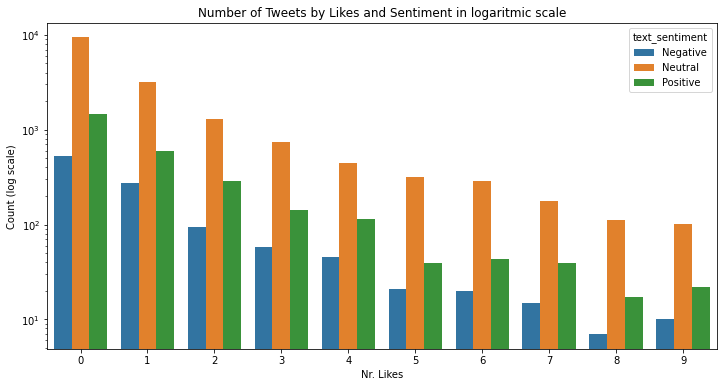

In [51]:
#Faccio il grafo in scala logaritmica (che se non ricordo male attenua le differenze) per visualizzare meglio
plt.figure(figsize=(12, 6))
sns.barplot(data=tweets_agg_df, x="likeCount", order=df["likeCount"].value_counts().index[:10], y="count", hue="text_sentiment")
plt.yscale('log')  # Imposta la scala logaritmica sull'asse y
plt.xlabel("Nr. Likes")
plt.ylabel("Count (log scale)")  # Aggiungi un'etichetta per l'asse y con scala logaritmica
plt.title("Number of Tweets by Likes and Sentiment in logaritmic scale")
plt.show()


In [52]:
#Eseguo stessa operazione per Replies
tweets_agg_df = df.groupby(["replies", "text_sentiment"])["tweetText"].count().reset_index()
tweets_agg_df.columns = ["replies", "text_sentiment", "count"]
tweets_agg_df.head(5)

,replies,text_sentiment,count
0,0.0,Negative,787
1,0.0,Neutral,13033
2,0.0,Positive,2094
3,1.0,Negative,254
4,1.0,Neutral,2743


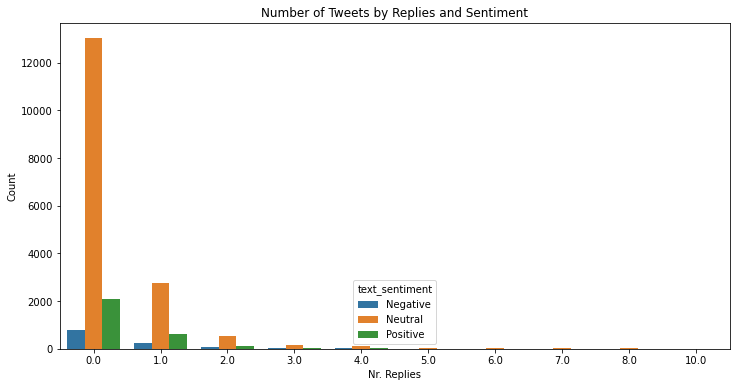

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(data=tweets_agg_df, x="replies",order=df["replies"].value_counts().index[:10], y="count", hue="text_sentiment")
plt.xlabel("Nr. Replies")
plt.ylabel("Count")
plt.title("Number of Tweets by Replies and Sentiment")
plt.show()


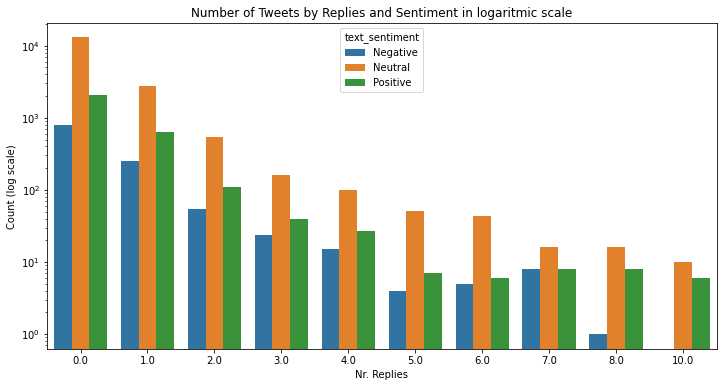

In [54]:
#Faccio il grafo in scala logaritmica (che se non ricordo male attenua le differenze) per visualizzare meglio
plt.figure(figsize=(12, 6))
sns.barplot(data=tweets_agg_df, x="replies", order=df["replies"].value_counts().index[:10], y="count", hue="text_sentiment")
plt.yscale('log')  # Imposta la scala logaritmica sull'asse y
plt.xlabel("Nr. Replies")
plt.ylabel("Count (log scale)")  # Aggiungi un'etichetta per l'asse y con scala logaritmica
plt.title("Number of Tweets by Replies and Sentiment in logaritmic scale")
plt.show()


# Dai grafici sembra che in generale le persone retwittano e mettono più like ai post classificati come "neutrali" probabilmente il sentiment analyzer non va bene con l'italiano)

# Provo a creare wordcloud con le parole dei tweet che hanno più like --> positivi e negativi

In [55]:
stopwords = set(STOPWORDS)

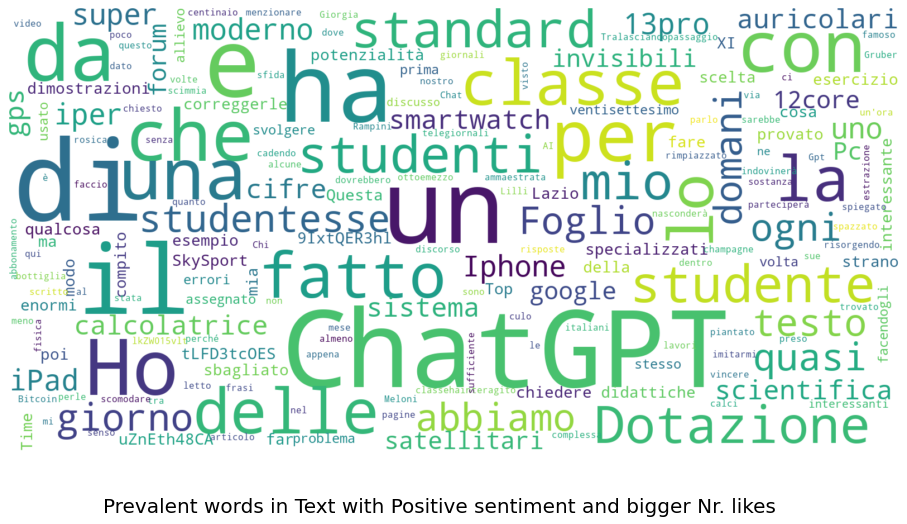

In [56]:
def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object", "y"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show() 
# Filtra i dati per testo positivo e i 10 maggiori numeri di like
positive_top_likes = df.loc[df['text_sentiment'] == "Positive"].nlargest(10, 'likeCount')

# Ottieni i contenuti dei tweet
positive_text = positive_top_likes['tweetText']

# Mostra la nuvola di parole
show_wordcloud(positive_text, title='Prevalent words in Text with Positive sentiment and bigger Nr. likes')


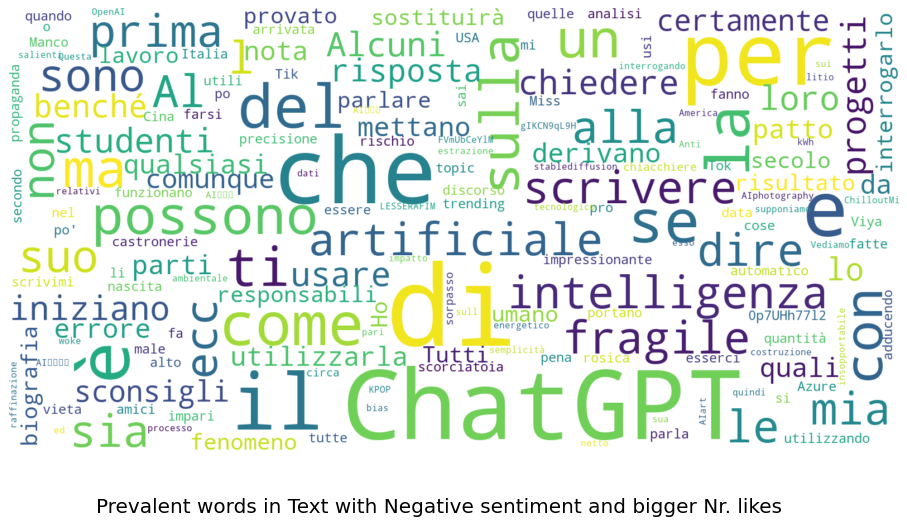

In [57]:
def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show() 
# Filtra i dati per testo positivo e i 10 maggiori numeri di like
positive_top_likes = df.loc[df['text_sentiment'] == "Negative"].nlargest(10, 'likeCount')

# Ottieni i contenuti dei tweet
positive_text = positive_top_likes['tweetText']

# Mostra la nuvola di parole
show_wordcloud(positive_text, title='Prevalent words in Text with Negative sentiment and bigger Nr. likes')


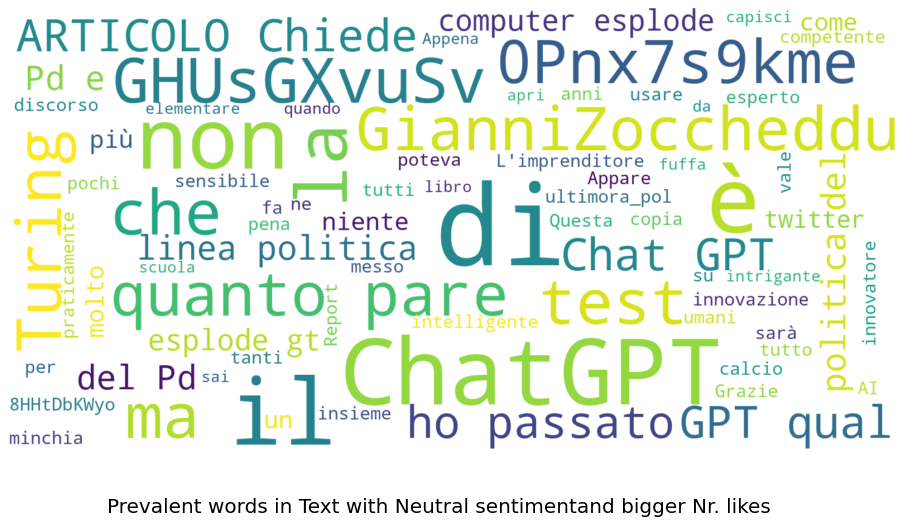

In [58]:
def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show() 
# Filtra i dati per testo positivo e i 10 maggiori numeri di like
positive_top_likes = df.loc[df['text_sentiment'] == "Neutral"].nlargest(10, 'likeCount')

# Ottieni i contenuti dei tweet
positive_text = positive_top_likes['tweetText']

# Mostra la nuvola di parole
show_wordcloud(positive_text, title='Prevalent words in Text with Neutral sentimentand bigger Nr. likes')


# Provo a fare i barplot ma per i contenuti non funzionano

/Applications/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127894 (\N{MILITARY MEDAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


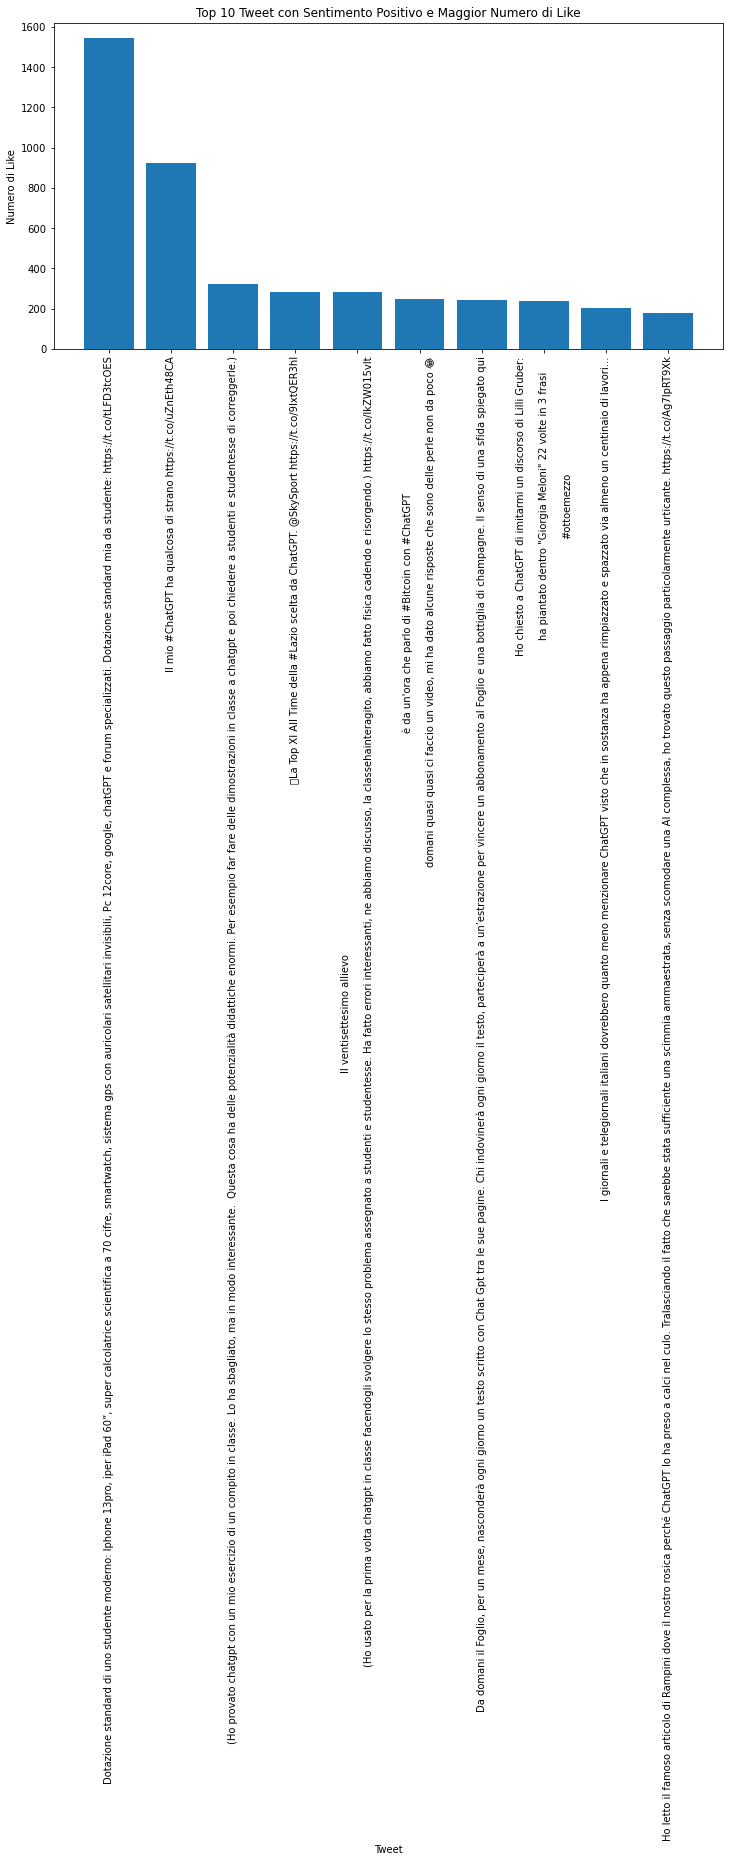

In [59]:
import matplotlib.pyplot as plt

# Filtra i dati per testo positivo e i 10 maggiori numeri di like
neutral_top_likes = df.loc[df['text_sentiment'] == "Positive"].nlargest(10, 'likeCount')

# Ottieni i contenuti dei tweet
neutral_text = neutral_top_likes['tweetText']

# Tracciamento del barplot
plt.figure(figsize=(12, 6))
plt.bar(range(len(neutral_text)), neutral_top_likes['likeCount'])
plt.xticks(range(len(neutral_text)), neutral_text, rotation=90)
plt.xlabel('Tweet')
plt.ylabel('Numero di Like')
plt.title('Top 10 Tweet con Sentimento Positivo e Maggior Numero di Like')
plt.show()


/Applications/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127894 (\N{MILITARY MEDAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


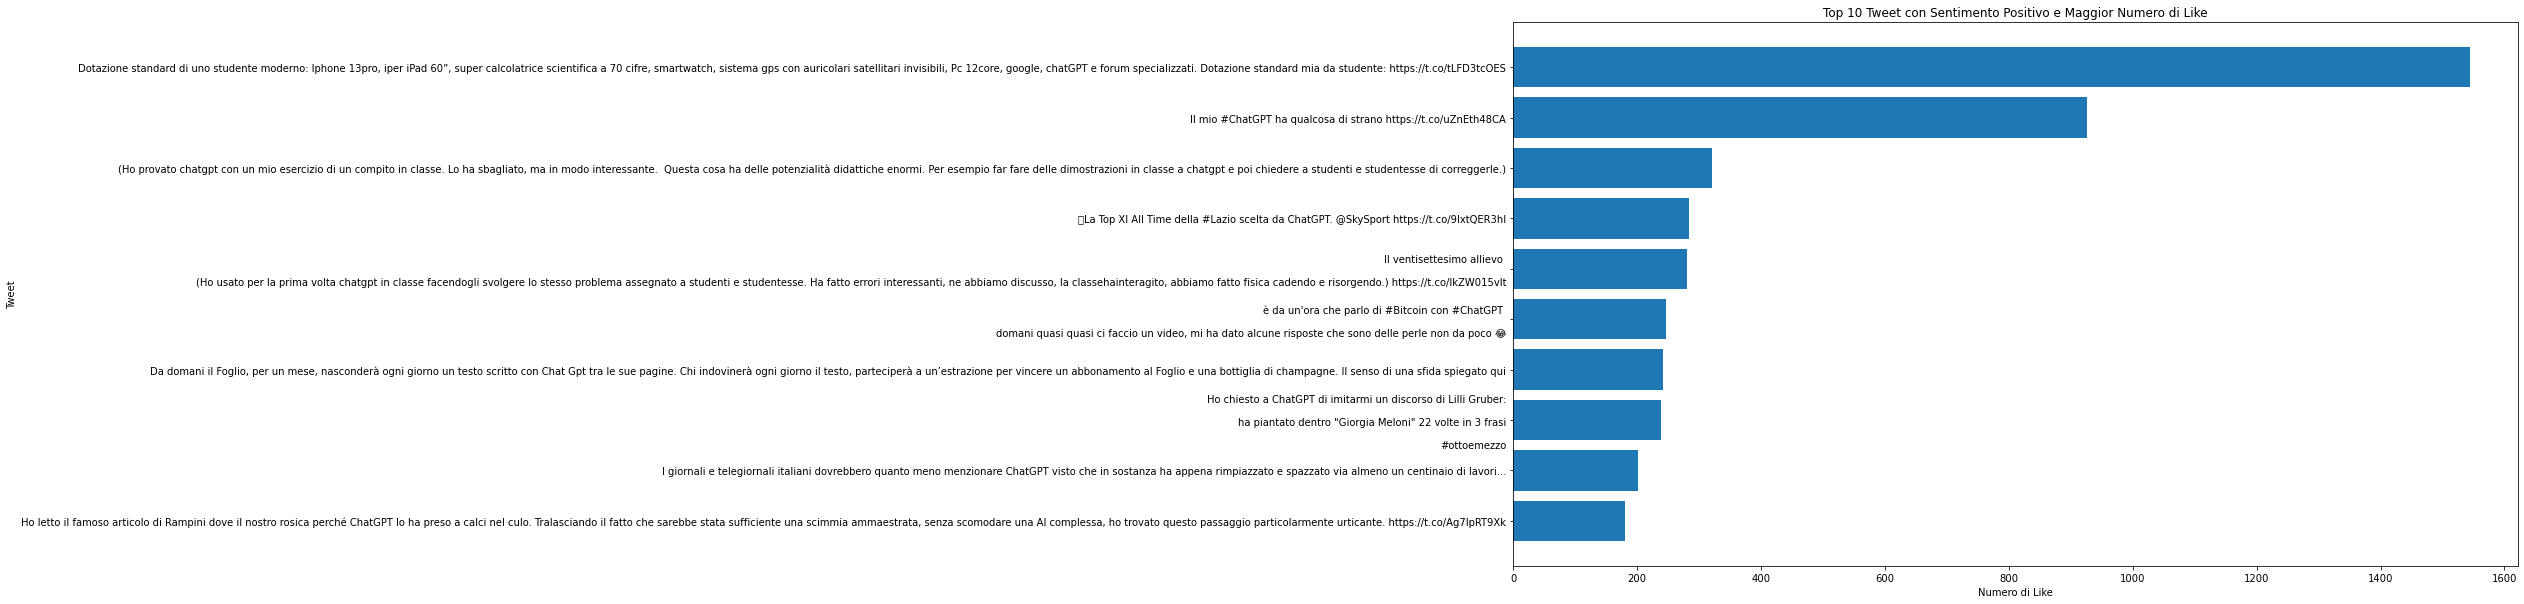

In [60]:
#Sentimento positivo

import matplotlib.pyplot as plt

# Filtra i dati per testo positivo e i 10 maggiori numeri di like
neutral_top_likes = df.loc[df['text_sentiment'] == "Positive"].nlargest(10, 'likeCount')

# Inverti l'ordine dei dati in modo che il tweet con più like sia in alto
neutral_top_likes = neutral_top_likes.iloc[::-1]

# Ottieni i contenuti dei tweet
neutral_text = neutral_top_likes['tweetText']

# Tracciamento del barplot
plt.figure(figsize=(18, 10))
plt.barh(range(len(neutral_text)), neutral_top_likes['likeCount'])
plt.yticks(range(len(neutral_text)), neutral_text)
plt.ylabel('Tweet')
plt.xlabel('Numero di Like')
plt.title('Top 10 Tweet con Sentimento Positivo e Maggior Numero di Like')
plt.show()



/Applications/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10549 (\N{ARROW POINTING RIGHTWARDS THEN CURVING DOWNWARDS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Applications/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Applications/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Applications/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Applications/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from current font

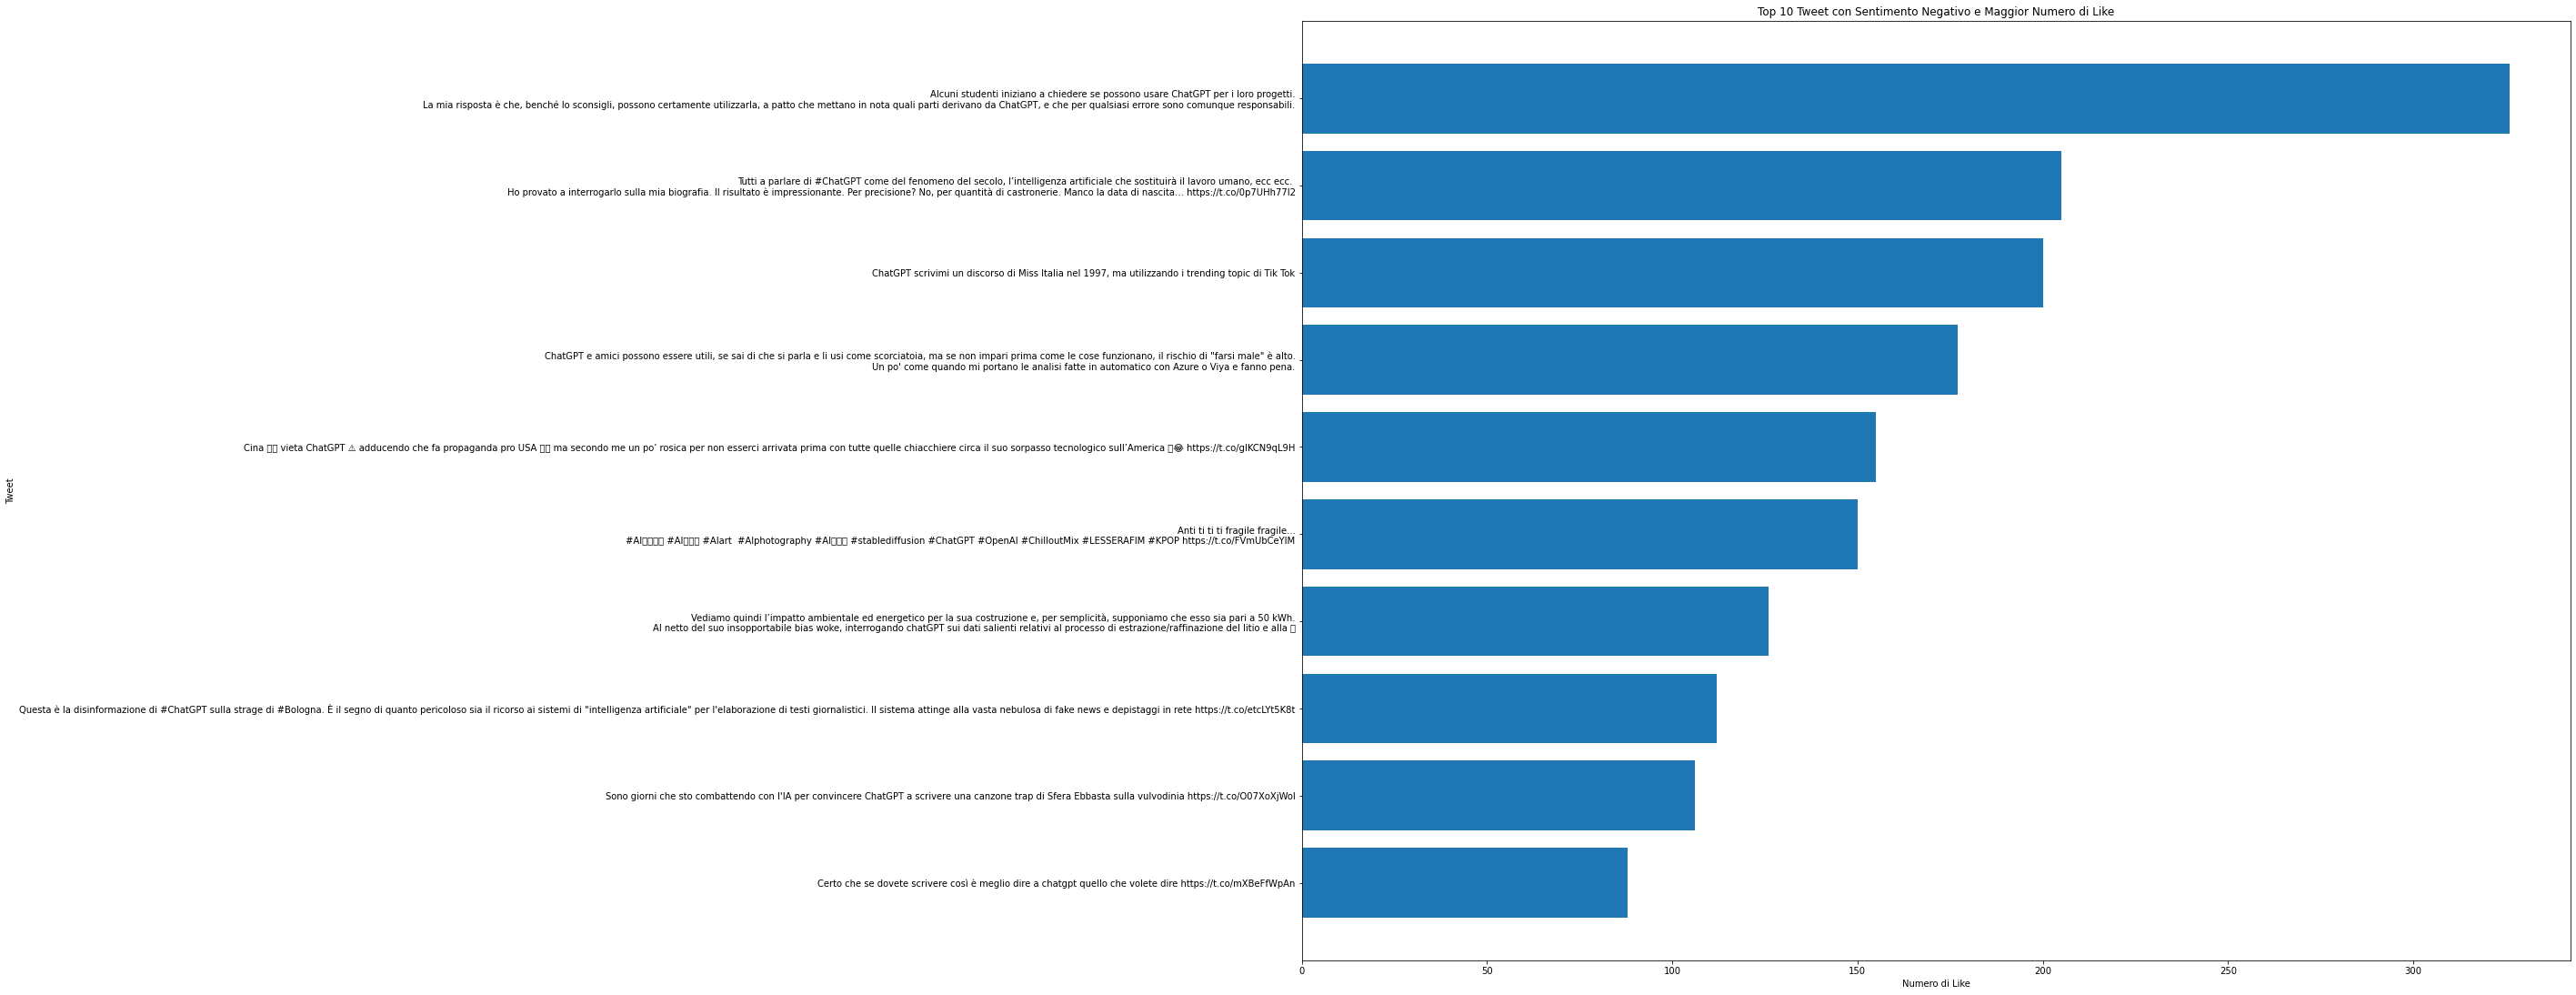

In [61]:
#Sentimento negativo 

import matplotlib.pyplot as plt

# Filtra i dati per testo positivo e i 10 maggiori numeri di like
neutral_top_likes = df.loc[df['text_sentiment'] == "Negative"].nlargest(10, 'likeCount')

# Inverti l'ordine dei dati in modo che il tweet con più like sia in alto
neutral_top_likes = neutral_top_likes.iloc[::-1]

# Ottieni i contenuti dei tweet
neutral_text = neutral_top_likes['tweetText']

# Tracciamento del barplot
plt.figure(figsize=(25, 19))
plt.barh(range(len(neutral_text)), neutral_top_likes['likeCount'])
plt.yticks(range(len(neutral_text)), neutral_text)
plt.ylabel('Tweet')
plt.xlabel('Numero di Like')
plt.title('Top 10 Tweet con Sentimento Negativo e Maggior Numero di Like')
plt.show()

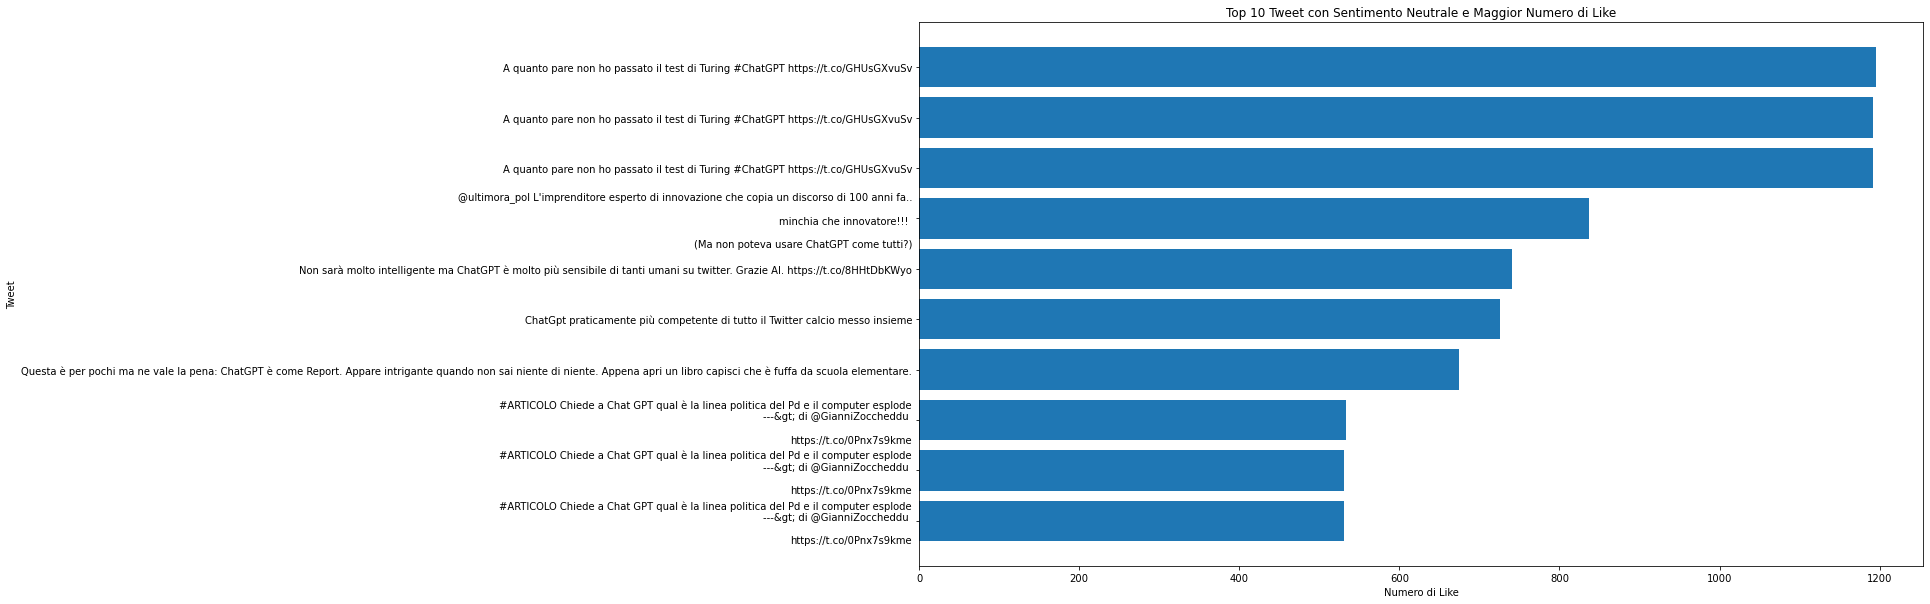

In [62]:
#Sentimento neutrale

import matplotlib.pyplot as plt

# Filtra i dati per testo neutrale e i 10 maggiori numeri di like
neutral_top_likes = df.loc[df['text_sentiment'] == "Neutral"].nlargest(10, 'likeCount')

# Inverti l'ordine dei dati in modo che il tweet con più like sia in alto
neutral_top_likes = neutral_top_likes.iloc[::-1]

# Ottieni i contenuti dei tweet
neutral_text = neutral_top_likes['tweetText']

# Tracciamento del barplot
plt.figure(figsize=(18, 10))
plt.barh(range(len(neutral_text)), neutral_top_likes['likeCount'])
plt.yticks(range(len(neutral_text)), neutral_text)
plt.ylabel('Tweet')
plt.xlabel('Numero di Like')
plt.title('Top 10 Tweet con Sentimento Neutrale e Maggior Numero di Like')
plt.show()

